In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [211]:
data = pd.read_csv("7_CarPrice_Prediction.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [213]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [214]:
#Dropping null values
data = data.dropna()
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [215]:
data.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [216]:
data['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64

In [217]:
data['seller_type'].value_counts()

seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [218]:
data['transmission'].value_counts()

transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64

In [219]:
data['owner'].value_counts()

owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [220]:
#Data Preprocessing
data.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [221]:
encoder = LabelEncoder() 

In [222]:
cat = ['fuel', 'seller_type', 'transmission', 'owner']

for i in cat:
    data[i] = encoder.fit_transform(data[i])


In [223]:
numExtract = ['mileage', 'engine', 'max_power']
for i in numExtract:
    data[i] = data[i].str.extract('(\d+)', expand = False)
    data[i] = data[i].astype(int)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Tarun V\AppData\Local\Temp\ipykernel_11248\2413679132.py:3: SyntaxWarning: invalid escape sequence '\d'
  data[i] = data[i].str.extract('(\d+)', expand = False)


In [224]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21,1498,103,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16,1298,88,"11.5@ 4,500(kgm@ rpm)",5.0


In [225]:
X = data.drop(columns = ['selling_price', 'name', 'torque'], axis = 1)
Y = data['selling_price']

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [226]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [227]:
#Model - Linear Regression

modelLR = LinearRegression()


In [228]:
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [229]:
#Prediction on Training Data
prediction = modelLR.predict(xTrain)
mse = metrics.mean_squared_error(yTrain, prediction)
r2 = metrics.r2_score(yTrain, prediction)

print("MSE: ", mse)
print("R^2: ", r2)


MSE:  212603203011.3651
R^2:  0.6746519064500756


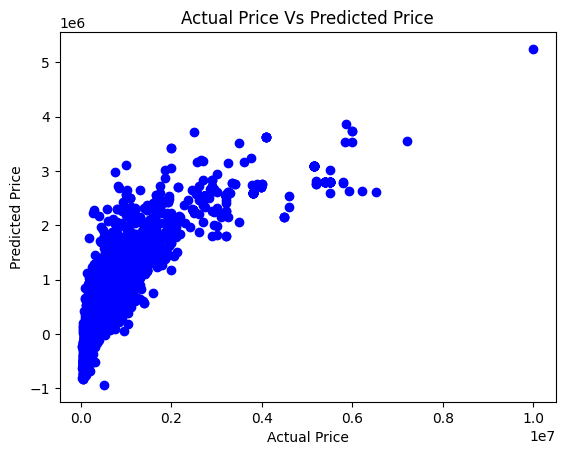

In [230]:
#Visualize Training Evaluation
plt.scatter(yTrain, prediction, color = "Blue")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [231]:
#Prediction on Testing Data
prediction = modelLR.predict(xTest)
mse = metrics.mean_squared_error(yTest, prediction)
r2 = metrics.r2_score(yTest, prediction)

print("MSE: ", mse)
print("R^2: ", r2)

MSE:  212844994250.99274
R^2:  0.6938728807711173


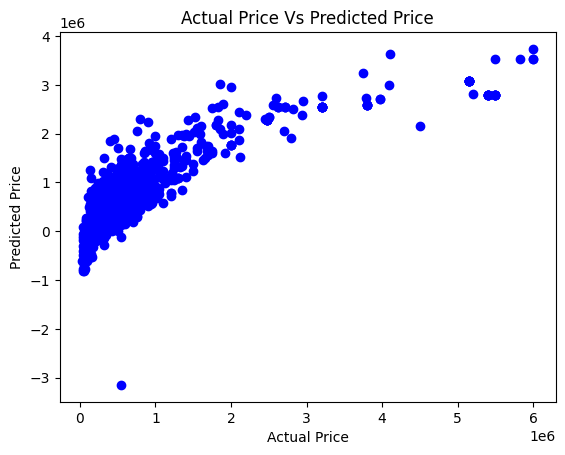

In [232]:
#Visualize Testing Evaluation
plt.scatter(yTest, prediction, color = "Blue")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [233]:
#Model - Lasso Regression
modelLa = Lasso()

In [234]:
modelLa.fit(xTrain, yTrain)

Lasso()

In [235]:
#Prediction on Training Data
prediction = modelLa.predict(xTrain)
mse = metrics.mean_squared_error(yTrain, prediction)
r2 = metrics.r2_score(yTrain, prediction)

print("MSE: ", mse)
print("R^2: ", r2)


MSE:  212603203021.13934
R^2:  0.674651906435118


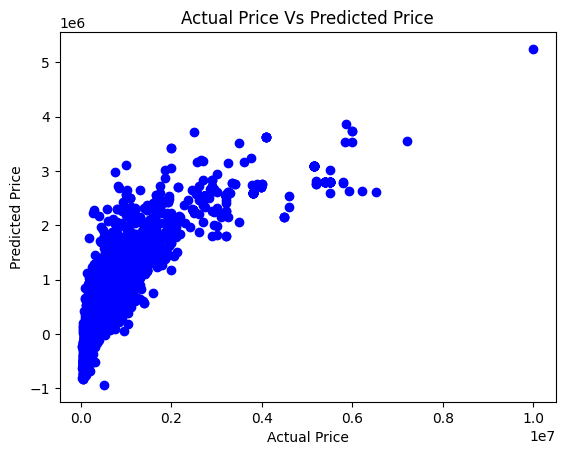

In [236]:

#Visualize Training Evaluation
plt.scatter(yTrain, prediction, color = "Blue")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


In [237]:

#Prediction on Testing Data
prediction = modelLa.predict(xTest)
mse = metrics.mean_squared_error(yTest, prediction)
r2 = metrics.r2_score(yTest, prediction)

print("MSE: ", mse)
print("R^2: ", r2)


MSE:  212844944647.70813
R^2:  0.6938729521136954


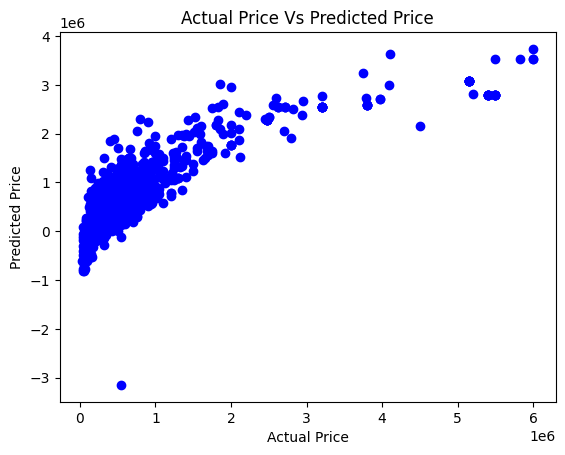

In [238]:


#Visualize Testing Evaluation
plt.scatter(yTest, prediction, color = "Blue")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()